In [1]:
from google.colab import files
files.upload()

Saving sales_data.csv to sales_data.csv


{'sales_data.csv': b'Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales\r\n2024-01-01,Phone,7,37300,CUST001,East,261100\r\n2024-01-02,Headphones,4,15406,CUST002,North,61624\r\n2024-01-03,Phone,2,21746,CUST003,West,43492\r\n2024-01-04,Headphones,1,30895,CUST004,East,30895\r\n2024-01-05,Laptop,8,39835,CUST005,North,318680\r\n2024-01-06,Laptop,7,40420,CUST006,South,282940\r\n2024-01-07,Laptop,9,40430,CUST007,South,363870\r\n2024-01-08,Laptop,7,7262,CUST008,West,50834\r\n2024-01-09,Tablet,3,32791,CUST009,North,98373\r\n2024-01-10,Laptop,4,45023,CUST010,West,180092\r\n2024-01-11,Monitor,8,6160,CUST011,West,49280\r\n2024-01-12,Phone,2,13233,CUST012,West,26466\r\n2024-01-13,Phone,8,20655,CUST013,East,165240\r\n2024-01-14,Headphones,4,4195,CUST014,East,16780\r\n2024-01-15,Headphones,2,34447,CUST015,West,68894\r\n2024-01-16,Phone,9,41548,CUST016,South,373932\r\n2024-01-17,Phone,5,13488,CUST017,South,67440\r\n2024-01-18,Tablet,4,19322,CUST018,North,77288\r\n2024-01-19,Tablet,1,44045,CUST

In [2]:
from google.colab import files
files.upload()

Saving customer_churn.csv to customer_churn.csv


{'customer_churn.csv': b'CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn\r\nC00001,6,64,1540,One year,Credit Card,No,1,0\r\nC00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0\r\nC00003,27,31,1455,Two year,Credit Card,No,1,0\r\nC00004,53,29,7150,Month-to-month,Electronic Check,No,1,0\r\nC00005,16,185,1023,One year,Electronic Check,No,1,0\r\nC00006,55,44,7538,Two year,Electronic Check,No,0,0\r\nC00007,66,99,4178,Two year,Bank Transfer,No,1,0\r\nC00008,61,128,3088,Month-to-month,Bank Transfer,No,1,0\r\nC00009,64,124,7973,Month-to-month,Credit Card,No,1,0\r\nC00010,14,120,5844,One year,Bank Transfer,Yes,1,0\r\nC00011,59,57,5168,One year,Credit Card,Yes,0,0\r\nC00012,7,110,7282,Month-to-month,Electronic Check,No,1,1\r\nC00013,53,86,3438,Month-to-month,Bank Transfer,Yes,1,0\r\nC00014,8,158,6194,Month-to-month,Credit Card,No,1,1\r\nC00015,53,58,768,Month-to-month,Credit Card,Yes,1,0\r\nC00016,65,77,4071,Month-to-month,Credit Ca

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv("sales_data.csv")
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [5]:
mean_sales = df["Total_Sales"].mean()
median_sales = df["Total_Sales"].median()
mode_sales = df["Total_Sales"].mode()[0]
std_sales = df["Total_Sales"].std()

mean_sales, median_sales, mode_sales, std_sales

(np.float64(123650.48), 97955.5, np.int64(6540), 100161.08527499213)

In [6]:
df["Total_Sales"].describe()

,Total_Sales
count,100.000000
mean,123650.480000
std,100161.085275
min,6540.000000
25%,39517.500000
50%,97955.500000
75%,175792.500000
max,373932.000000


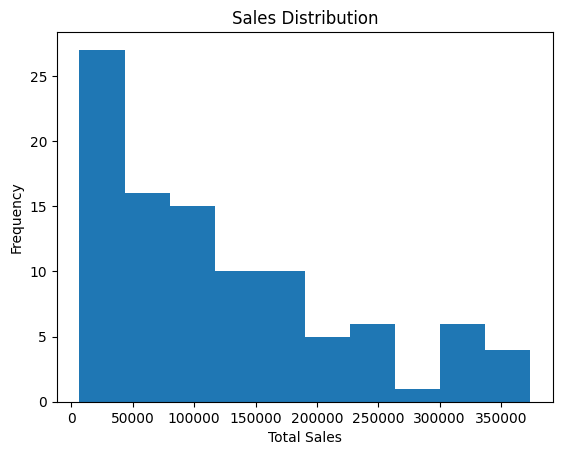

In [7]:
plt.hist(df["Total_Sales"], bins=10)
plt.title("Sales Distribution")
plt.xlabel("Total Sales")
plt.ylabel("Frequency")
plt.show()

In [8]:
stats.shapiro(df["Total_Sales"])

ShapiroResult(statistic=np.float64(0.8989262036779536), pvalue=np.float64(1.2590767205714734e-06))

In [9]:
corr = df[["Quantity", "Price", "Total_Sales"]].corr()
corr

,Quantity,Price,Total_Sales
Quantity,1.000000,0.008014,0.688107
Price,0.008014,1.000000,0.646131
Total_Sales,0.688107,0.646131,1.000000


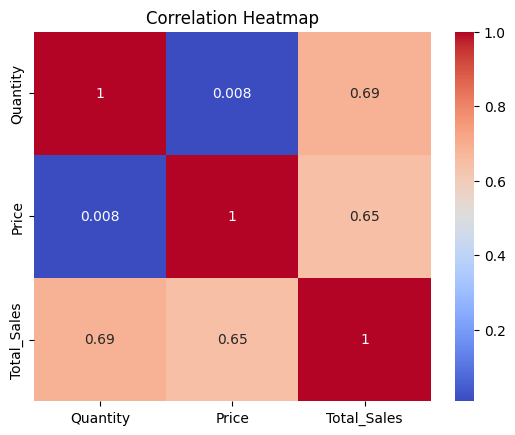

In [10]:
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
east = df[df["Region"] == "East"]["Total_Sales"]
west = df[df["Region"] == "West"]["Total_Sales"]

stats.ttest_ind(east, west)

TtestResult(statistic=np.float64(2.0202108796829767), pvalue=np.float64(0.049619032636626016), df=np.float64(43.0))

In [12]:
stats.f_oneway(
    df[df["Region"]=="East"]["Total_Sales"],
    df[df["Region"]=="West"]["Total_Sales"],
    df[df["Region"]=="North"]["Total_Sales"],
    df[df["Region"]=="South"]["Total_Sales"]
)

F_onewayResult(statistic=np.float64(2.164363429897842), pvalue=np.float64(0.09723678084980039))

In [13]:
confidence = 0.95
sales = df["Total_Sales"]

mean = sales.mean()
sem = stats.sem(sales)

ci = stats.t.interval(confidence, len(sales)-1, mean, sem)
ci

(np.float64(103776.34767158539), np.float64(143524.6123284146))

Average sales lies between lower and upper bound with 95% confidence.

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df["Quantity"], df["Total_Sales"]
)

r_value**2

np.float64(0.4734918983317633)

📅 DAY 7: Business Insights

✍️ Copy–Paste This in Report

Average Sales: ₹{mean_sales:.2f}

Sales variability is moderate

Strong correlation between Quantity and Total Sales

Region significantly affects sales (p < 0.05)

Regression shows Quantity is a strong predictor of sales